In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

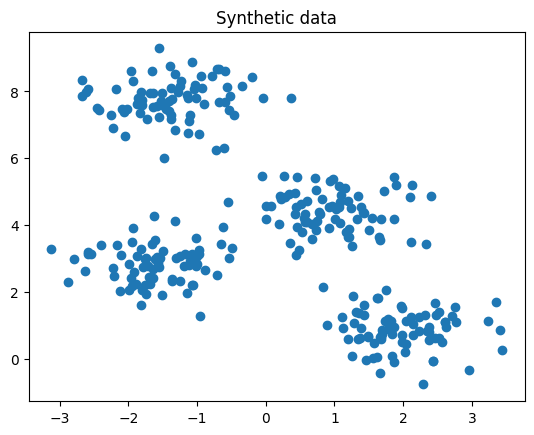

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title('Synthetic data')
plt.show()

In [4]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [5]:
inertia

[2812.1375953032334,
 1439.8613952005378,
 546.8911504626299,
 212.00599621083475,
 194.9660162355427,
 177.86899482176702,
 164.9562143191074,
 143.96669359684984,
 133.6180436385599,
 116.00599732388083]

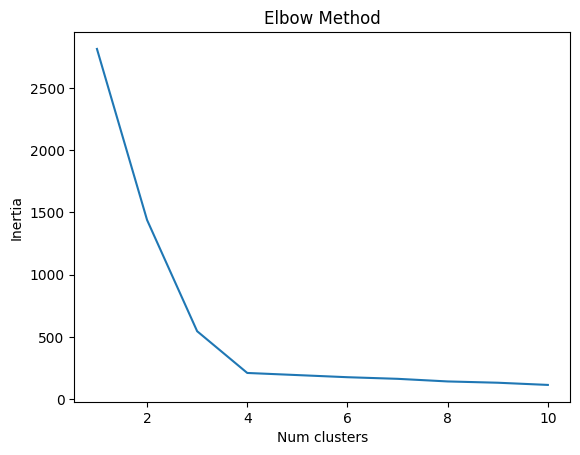

In [6]:
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Num clusters')
plt.ylabel('Inertia')
plt.show()
# 4 is an obvious elbow, no more clusters than 4

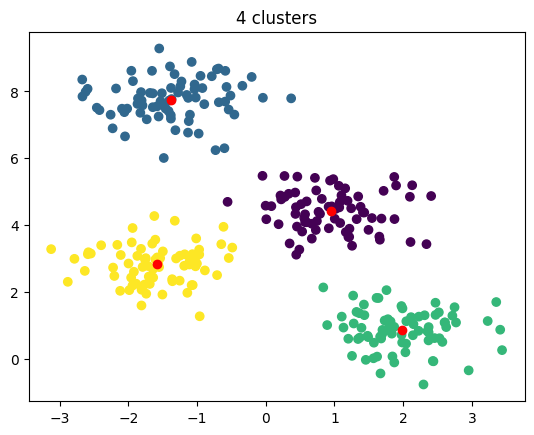

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('4 clusters')
plt.show()

In [8]:
labels

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3], d

In [9]:
import pandas as pd
df = pd.DataFrame(X)
df['label'] = labels
df

,0,1,label
0,0.836857,2.136359,2
1,-1.413658,7.409623,1
2,1.155213,5.099619,0
3,-1.018616,7.814915,1
4,1.271351,1.892542,2
...,...,...,...
295,1.973698,1.579798,2
296,2.518342,1.391766,2
297,0.438990,4.535929,0
298,0.369479,7.791105,1


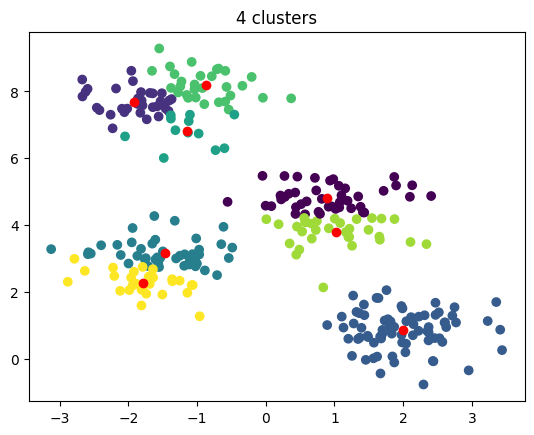

In [10]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('4 clusters')
plt.show()

In [11]:
sil_score = silhouette_score(X, labels)
print(sil_score)

0.41225411168893167


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

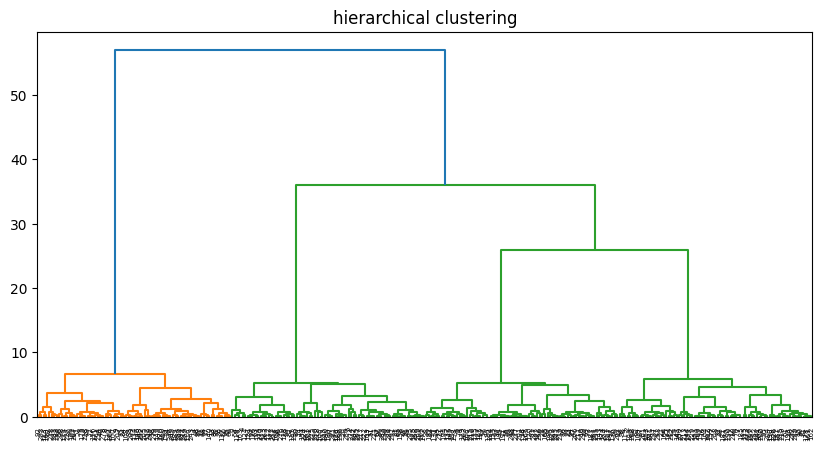

In [13]:
Z = linkage(X, method='ward')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('hierarchical clustering')
plt.show()

In [14]:
clusters = fcluster(Z, t=5, criterion='distance')
clusters

array([3, 2, 8, 1, 3, 5, 6, 9, 1, 1, 7, 2, 9, 2, 4, 9, 9, 5, 7, 6, 5, 5,
       8, 7, 6, 8, 5, 8, 7, 8, 1, 2, 9, 2, 2, 2, 2, 2, 6, 3, 9, 6, 8, 9,
       6, 7, 1, 7, 2, 5, 7, 5, 1, 3, 3, 7, 1, 6, 2, 3, 2, 9, 1, 7, 7, 7,
       2, 5, 2, 7, 9, 7, 1, 7, 6, 1, 7, 9, 5, 1, 4, 9, 3, 5, 1, 8, 5, 8,
       2, 2, 9, 5, 1, 7, 7, 9, 3, 5, 8, 7, 1, 4, 1, 5, 9, 5, 4, 9, 2, 8,
       6, 7, 3, 1, 3, 9, 2, 3, 3, 8, 7, 3, 7, 3, 3, 5, 3, 6, 3, 6, 1, 6,
       6, 4, 2, 6, 7, 2, 9, 1, 2, 7, 9, 7, 9, 6, 2, 8, 2, 2, 2, 9, 2, 8,
       4, 7, 1, 6, 5, 9, 1, 9, 9, 3, 8, 7, 6, 8, 3, 9, 9, 1, 3, 9, 7, 1,
       5, 5, 9, 7, 5, 9, 6, 7, 8, 9, 8, 9, 5, 2, 9, 7, 9, 9, 6, 6, 7, 9,
       6, 2, 9, 7, 4, 6, 9, 2, 7, 1, 9, 2, 9, 7, 8, 9, 2, 6, 6, 5, 4, 9,
       2, 5, 5, 7, 4, 7, 9, 1, 1, 9, 9, 1, 9, 3, 7, 9, 5, 7, 1, 7, 5, 8,
       5, 2, 2, 2, 2, 7, 7, 2, 9, 7, 3, 8, 7, 7, 7, 5, 5, 2, 9, 8, 7, 3,
       1, 7, 9, 1, 8, 5, 3, 7, 6, 9, 5, 4, 3, 9, 1, 2, 5, 5, 9, 5, 5, 5,
       2, 7, 1, 9, 4, 5, 2, 1, 1, 5, 5, 8, 1, 7], d

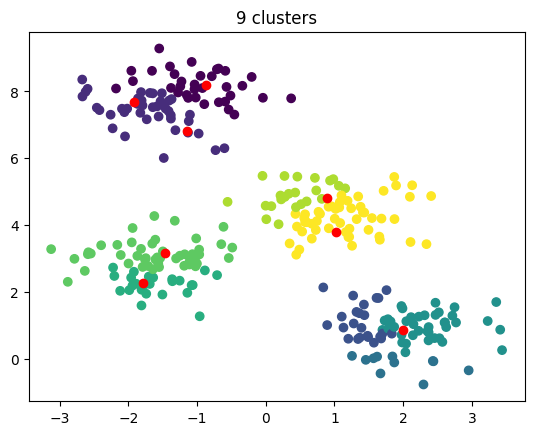

In [15]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('9 clusters')
plt.show()

In [16]:
sil_score = silhouette_score(X, clusters)
print(sil_score)

0.3104617258948206


In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples =5)
dbscan_labels = dbscan.fit_predict(X)

In [18]:
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(dbscan_sil_score)

0.6303800996842714


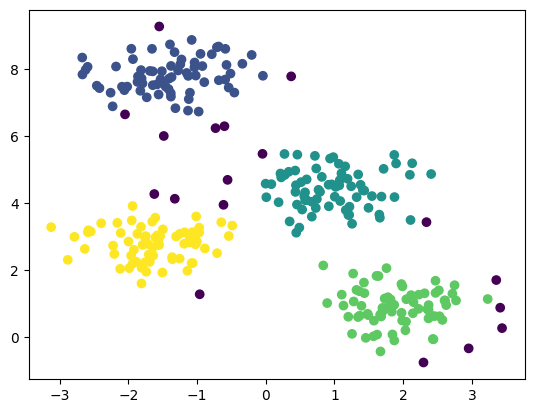

In [20]:
plt.scatter(X[:,0], X[:,1], c=dbscan_labels)
plt.show()

In [27]:
import fileinput
with fileinput.FileInput('/Users/aimerliu1/Desktop/assignment2-data/LD2011_2014.txt', inplace=True) as file:
    for line in file:
        print(line.replace(',', '.'), end='')

In [29]:
# electricity data

df = pd.read_csv('/Users/aimerliu1/Desktop/assignment2-data/LD2011_2014.txt', sep=';')

In [30]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [31]:
data2011 = df.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = df.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = df.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = df.loc['2014-01-01 00:15:00':'2014-01-01 00:00:00']

In [ ]:
clients = data2022.columns
clients_no_demand = clients[data2013.mean(==0)]
data_13_14 = pd.concat([data2013, data2014], axis=)